# PA005: HIGH VALUE CUSTOMER INDETIFICATION (INSIDERS)

# Planejamento da solução (IOT)

## Input

    1. Problema de negócio
        -> selecionar os clientes mais valiosos para integrar a um programa de fidelização

    2. Conjunto de dados
        -> Vendas de um e-commerce online durante o período de um ano

## Output

    A indicação das pessoas que darão parte do programa insiders

    -> Relatório com as respostas das perguntas do negócio

            1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
            2. Quantos clientes farão parte do grupo?
            3. Quais as principais características desses clientes?
            4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
            5. Qual a expectativa de faturamento desse grupo para os próximos meses?
            6. Quais as condições para uma pessoa ser elegível ao Insiders?
            7. Quais as condições para uma pessoa ser removida do Insiders?
            8. Qual a garantia que o programa Insiders é melhor que o restante da base?
            9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks

    1 - Quem são as pessoas elegíveis para participar do programa de Insiders?

    2 - O que é seer elegível? O que são clientes de maior valor?
        -> em relação a faturamento
            -> alto ticket médio (quanto o cliente gastou na média com a empresa)
            -> alto LVT (soma do quanto o cliente gastou com a empresa)
            -> baixa recência (tempo da última compra do cliente)
            -> alto baskek size (tamanho da cesta de compra)
            -> baixa probabilidade de churn (período em que a pessoa parou de comprar com a empresa)
            -> alta propensão de compra (probabilidade de uma cliente em realizar uma nova compra)
        -> em relação a custo
            -> baixa taxa de devolução 
            -> em relação a experiência de compra
            -> média alta das avaliações

    3 - Quantos clientes farão parte do grupo?
        -> Com o número total de clientes vou fazer a porcentagem dos inseders

    4 - Quais as principais características desses clientes?
        -> Escrever as características do cliente
            -> Idade
            -> Localização
        -> Escrever cracterísticas do hábito de consumo
            -> Atributos da clusterização

    5 - Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
        -> Calcular o faturamento total do ano
        -> Calcular o faturamento do grupo
        -> Ver o quanto o grupo está em relação a esse faturamento

    6 -Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
        -> Calcular o faturamento total do ano
        -> Calcular o faturamento do grupo 
        -> Ver o quanto o grupo está em relação a esse faturamento

    7 -Qual a expectativa de faturamento desse grupo para os próximos meses?
        -> LTV do grupo insiders - está ligada com metas
        -> Análise de Cohort (análise onde você marca a pessoa no tempo/produto/compra)

    8 - Quais as condições para uma pessoa ser elegível ao Insiders?
        -> Definir a periodicidade do modelo (1 mes, 3 meses?)
        -> A pessoa precisa ser similar com uma pessoa do grupo

    9 - Quais as condições para uma pessoa ser removida do Insiders ?
        -> Definir a periodicidade do modelo (1 mes, 3 meses?) 
        -> A pessoa precisa ser dissimilar com uma pessoa do grupo

    10 - Qual a garantia que o programa Insiders é melhor que o restante da base ?
        -> Teste A/B
        -> Teste A/B beyesiano
        -> Teste de hipótese

    11 - Quais ações o time de marketing pode realizar para aumentar o faturamento?
        -> desconto 
        -> preferencia de compra
        -> frete
        -> visita 

passo 1: ordenar os clientes por recency

passo 2: dividir a base de clientes de acordo com as notas 

passo 3: ordenar pela frequency

passo 4: dar as notas 

passo 5: ordenar os clientes por monetary

passo 6: dar as notas

passo 7: calcular a média das notas para R, F, M

# 0.0 - Imports

 ## 0.1. Imports

In [1]:
#!pip install umap-learn
#!pip install -U yellowbrick

In [2]:
import numpy      as np
import pandas     as pd
import seaborn    as sns

import umap.umap_ as umap

from IPython.display       import Image
from matplotlib            import pyplot as plt

from pandas_profiling      import ProfileReport

from sklearn               import cluster as c
from sklearn               import metrics as m
from sklearn               import preprocessing as pp

from plotly                import express as px

from yellowbrick.cluster   import KElbowVisualizer, SilhouetteVisualizer

import inflection
import re
from numpy                 import int64
from IPython.core.display  import HTML

## 0.2. Helper Functions

In [133]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.rcParams['font.size'] = 25
    
    display(HTML( '<style>.container {width:100% !important;}</style>'))
    #pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
            
    sns.set()

In [134]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1.0 - Data Description

##  1.1. Load dataset

In [5]:
# read data
df_raw = pd.read_csv('C:/Users/DML1WFE/repos/projects/pa005_insiders_clustering/insiders_clustering/data/raw/Ecommerce.csv', encoding='unicode_escape', low_memory=False)

# drop extra column
df_raw = df_raw.drop(['Unnamed: 8'], axis = 1)

##  1.2. Rename Columns

In [6]:
df1 = df_raw.copy()

In [7]:
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

#rename

df1.columns = cols_new

##  1.3. Data Dimensions

In [8]:
print('Number od rows: {} '.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number od rows: 541909 
Number of columns: 8


## 1.4. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

##  1.5. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

##  1.6. Fillout NA

In [11]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [12]:
# create refrence
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

# merge original with refrence dataframe
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra Columns
df1 = df1.drop(columns = ['customer_id_x', 'customer_id_y'], axis = 1)

In [13]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [14]:
## combine usando lista
#missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
#df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice), :].head()

##  1.7. Chage dtypes

In [15]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int64)

In [16]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

##  1.8. Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 - Numerical Attributes

In [18]:
# central tendecy - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - desvio padrão, mínimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
#d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() - x.skew())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### <font color=red> 1.7.1.1 - Numerical Attributes - investigating  </font>

1 - quantity negativa (devolução?) 

2 - unit price zero?

### 1.7.2 - Categorical Attributes

#### Invoice No

In [19]:
#identificação
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search( '[^0-9]+' , x))), :]

print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))

Total number of invoices: 9291
Total number of negative quantity: 9288


#### Stock code

In [20]:
df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))),'stock_code'].unique()

# Ação
## Remove stock code in ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [21]:
df1.head()
#  delete description


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [22]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [23]:
df1['country'].value_counts(normalize=True).head(5)

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [24]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending = False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


#  2.0 - Filtering Feature

In [25]:
df2 = df1.copy()

In [26]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [27]:
# ==== Numerical attributes =====
df2 = df2.loc[df2['unit_price']>=0.04, :]

# ==== Categorical attributes =====
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

# description
df2 = df2.drop(columns = 'description', axis = 1)

# map
df2 = df2[~df2['country'].isin(['Unspecified','European Community'])]

# quantity
df2_returns = df2.loc[df2['quantity'] < 0, :] 
df2_purchases = df2.loc[df2['quantity'] >= 0, :]



# 3.0 - Feature Engineering

In [72]:
# Features ideas:
# Moving Average - 7 d , 14d , 30 d
# quantidade de compras 15  e 30

## 3.1. Data

In [93]:
df3 = df2.copy()

## 3.1. Feature Creation

In [94]:
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

### 3.1.1 Gross Revenue

In [95]:
df2_purchases.loc[:, ['gross_revenue']] = df2_purchases.loc[:, 'quantity'] * df2_purchases.loc[:, 'unit_price']

# monetary
df_monetary = df2_purchases.loc[:,['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2 Recency - day from last purchase

In [96]:
# Recency
df_recency = df2_purchases.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency,on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3 Quantity of purchased

In [97]:
df_freq= df2_purchases.loc[:,['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no': 'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 3.1.4 Quantity of items purchased

In [98]:
df_quantity = df2_purchases.loc[:,['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity': 'qtde_items'})
df_ref = pd.merge(df_ref, df_quantity, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 3.1.5 Quantity of products purchased

In [99]:
df_quantity = (df2_purchases.loc[:,['customer_id', 'stock_code']].groupby('customer_id').count()
                                                                .reset_index()
                                                                .rename(columns={'stock_code': 'qtde_products'}))

df_ref = pd.merge(df_ref, df_quantity, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 3.1.6 Average Ticked Value

In [100]:
# avg ticket
df_avg_ticket = df2_purchases.loc[:,['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 3.1.7 Average Recency Days

In [101]:
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending =['False', 'False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoice date

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['previous_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis = 1)

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis = 1 ).dropna()

# averege recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

# merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.8 Frequency Purchase

In [102]:
df_aux = (df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .agg(max_ = ('invoice_date', 'max'),
                                                                 min_ = ('invoice_date', 'min'),
                                                                 days_= ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1 ),
                                                                 buy_ = ('invoice_no', 'count') )).reset_index()

# frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: x['buy_'] / x['days_'] if x['days_'] !=0 else 0, axis = 1)

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on = 'customer_id', how = 'left')

df_ref.isna().sum()


customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 3.1.9 Number of Returns

In [103]:
# Number of Returns
df_returns = df2_returns.loc[:,['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_retruns'})
df_returns['qtde_retruns']  = df_returns['qtde_retruns'] * -1

df_ref = pd.merge(df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['qtde_retruns'].isna(), 'qtde_retruns'] = 0
#df_ref.isna().sum()

### 3.1.10 Unique Basket Size - quantidade de itens por cesta (Stock_code)

In [104]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                        .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                             n_products = ('quantity', 'sum')) 
                                                                        .reset_index() )     

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()                                                        

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_retruns           0
avg_basket_size       91
dtype: int64

### 3.1.11 Unique Basket Size - quantidade de distintos por compra

In [105]:
df_aux = (df2_purchases.loc[:,['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                        .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                             n_products = ('stock_code', 'count')) 
                                                                        .reset_index() )     

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_retruns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [106]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,1.000000


#  4.0 - Exploratory Data Analysis - EDA

In [118]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_retruns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1 Univariate Analysis

In [108]:
'''
profile = ProfileReport (df4)
profile.to_file('output.html')
'''

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 22.45it/s]


### 4.1.1 Gross Revenue

In [120]:
df4[df4['gross_revenue'] > 279138]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,28.611111


### 4.1.2 qtde products

In [142]:
df4[df4['qtde_products'] == 7838]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,63.209677


### 4.1.3 Avg Ticket

In [143]:
df4[df4['avg_ticket'] == 56157.5]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,qtde_products,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
3338,16446,168472.5,0.0,2.0,80997.0,3.0,56157.5,205.0,0.009709,80995.0,40498.5,1.5


In [144]:
df3[df3['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


## 4.2 Bivariate Analysis

In [146]:
cols = ['customer_id']
df42 = df4.drop(cols, axis = 1)

<Figure size 1800x864 with 0 Axes>

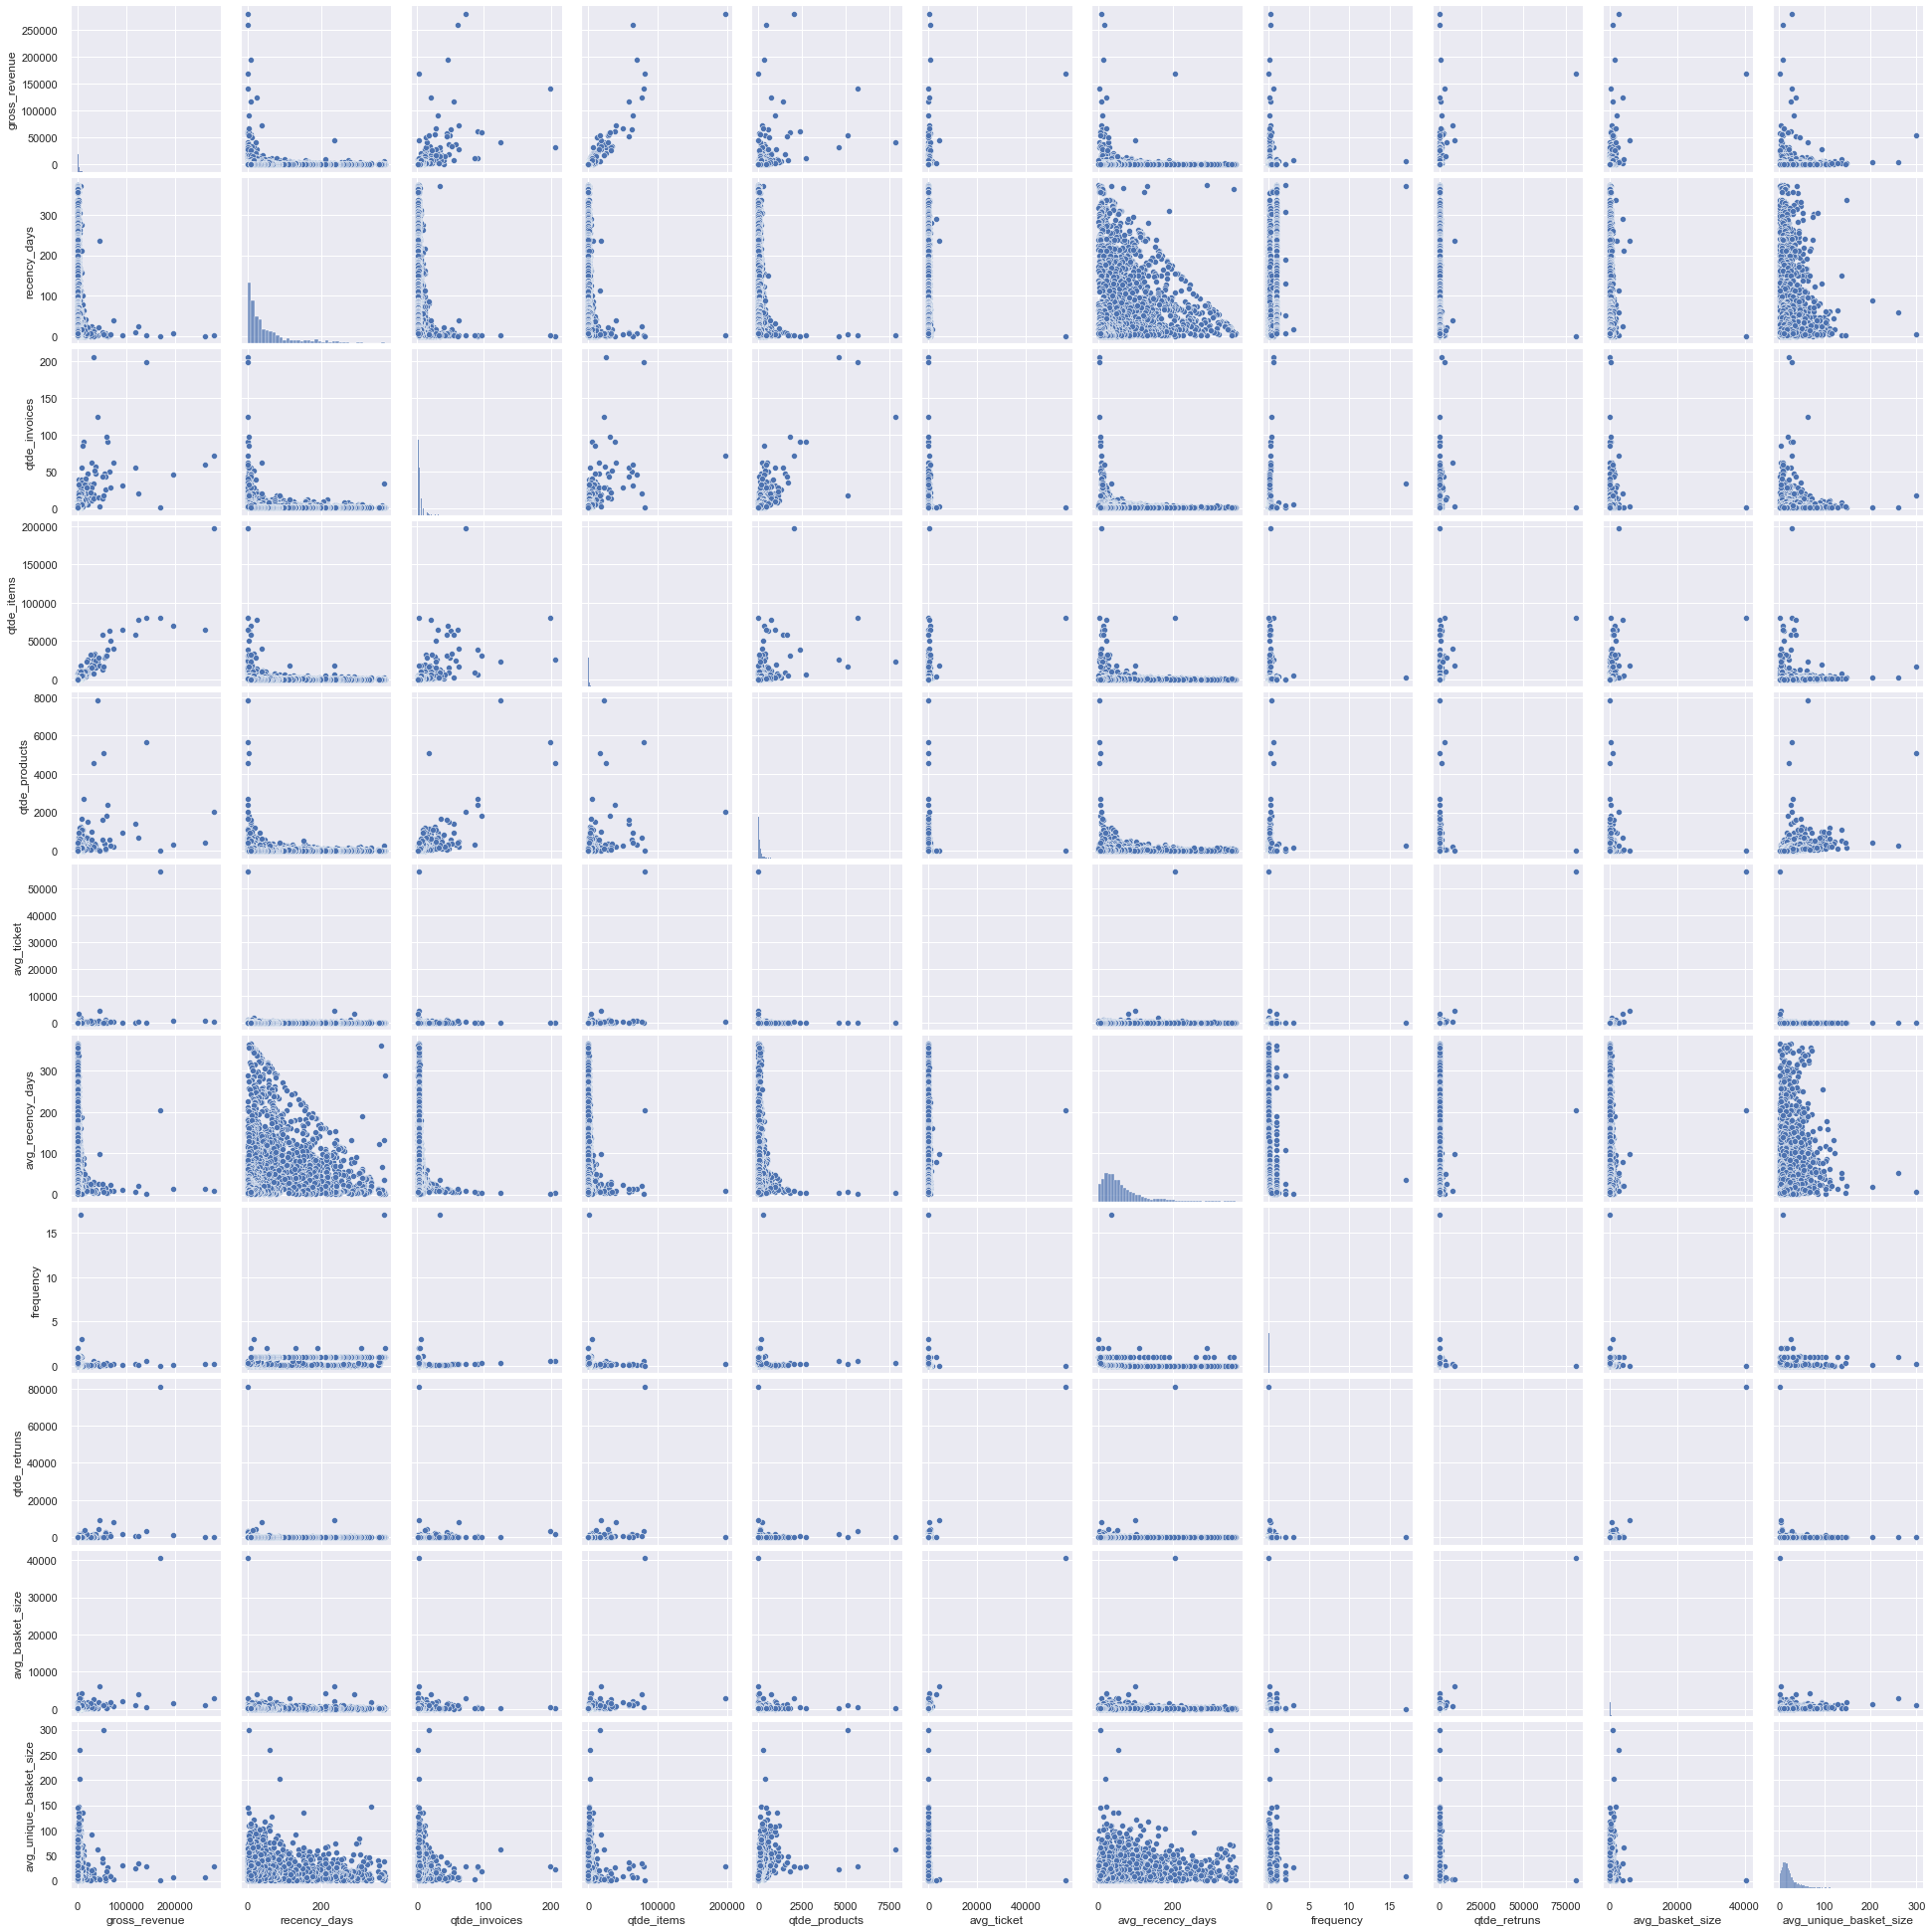

In [150]:
plt.figure(figsize = (25, 12))
sns.pairplot(df42)

#  5.0 - Data Preparation

In [44]:
df5 = df4.copy()

In [45]:
from sklearn import preprocessing as pp

In [46]:
ss = pp.StandardScaler()
df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform(df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])


In [47]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,quantity,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
0,17850,0.249733,3.958037,3.193307,6.0,-0.032549,35.500000,0.486111,40.0,50.970588,8.735294
1,13047,0.045683,-0.106602,0.370056,11.0,-0.031824,27.250000,0.048780,35.0,154.444444,19.000000
2,12583,0.373960,-0.801192,1.047636,24.0,-0.022180,23.187500,0.045699,50.0,335.200000,15.466667
3,13748,-0.170252,0.395046,-0.081664,8.0,-0.017392,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,-0.177082,3.456388,-0.307524,2.0,0.231589,8.600000,0.136364,22.0,26.666667,1.000000


In [48]:
sns.distplot(np.log(df5['gross_revenue']));

C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


#  6.0 - Feature Selection

In [49]:
df3 = df_ref

In [50]:
df6 = df5.copy()

#  7.0 - Hyperparameter Fine-Tunning

In [51]:
X = df6.drop(columns=['customer_id'])

In [52]:
X.head()

,gross_revenue,recency_days,invoice_no,quantity,avg_ticket,avg_recency_days,frequency,qtde_retruns,avg_basket_size,avg_unique_basket_size
0,0.249733,3.958037,3.193307,6.0,-0.032549,35.500000,0.486111,40.0,50.970588,8.735294
1,0.045683,-0.106602,0.370056,11.0,-0.031824,27.250000,0.048780,35.0,154.444444,19.000000
2,0.373960,-0.801192,1.047636,24.0,-0.022180,23.187500,0.045699,50.0,335.200000,15.466667
3,-0.170252,0.395046,-0.081664,8.0,-0.017392,92.666667,0.017921,0.0,87.800000,5.600000
4,-0.177082,3.456388,-0.307524,2.0,0.231589,8.600000,0.136364,22.0,26.666667,1.000000


In [53]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1 Within-Cluster Sum of Square (WSS)

In [54]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## 7.2 Sillhouette Score

In [55]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## 7.2.1 - Silhouette Analysis

In [56]:
fig, ax = plt.subplots(3,2, figsize=(25,18))

for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

#  8.0 - Model Training

## 8.1 - K-Means

In [57]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2 - Cluster Validation

In [58]:
from sklearn import metrics as m

In [59]:
## WSS (within Cluster sum of square)
print('WSS value: {}'. format(kmeans.inertia_))

## SS (Silhoutte Score) 
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 325339597.8069644
SS value: 0.8984800994513412


#  9.0 - Cluster Analysis

## 9.1 - Data

In [60]:
df9 = df6.copy()
df9['cluster'] = labels


## 9.2 - Visualization Inspection

In [61]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

C:\Users\dml1wfe\repos\envs\pa005_insiders_clustering\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## 9.3 - 2d plot

In [62]:
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster');

## 9.4 - UMAP

In [63]:
reducer = umap.UMAP(n_neighbors=90, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), data=df_viz);

## 9.5 - Cluster Profile

In [64]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['prec_customer'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Average invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# average ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,prec_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,41,1.380936,3.633128,-0.124484,1.838147,0.308438
1,1,2927,98.585382,-0.056243,0.002026,-0.025604,-0.022809
2,2,1,0.033681,15.665532,-0.826918,-0.420454,54.116300


Cluster 01: (candidato a insider)

    * número de customers : 6 (0,14% do customers)
    * Recência média: 7 dias
    * Compras média: 89 compras
    * Receita média: $182.182,00 USD

Cluster 02:

    * número de customers : 6 (0,70% do customers)
    * Recência média: 14 dias
    * Compras média: 53 compras
    * Receita média: $40.543,52 USD

Cluster 03:

    * número de customers : 4.335 (99% do customers)
    * Recência média: 92 dias
    * Compras média: 5 compras
    * Receita média: $1.372,57 USD

# 10.0 - Deploy to Production